In [50]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
import os
cwd = os.getcwd()
print(cwd)

C:\learn\Git\MachineLearning\HandsOnML


In [52]:
# reading the data
df = pd.read_csv("datasets/housing/housing.csv")
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Getting some info about data

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [54]:
# checking for nulls
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [55]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

### Visualizing and checking the data tendency

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F867160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FFDFC88>]], dtype=object)

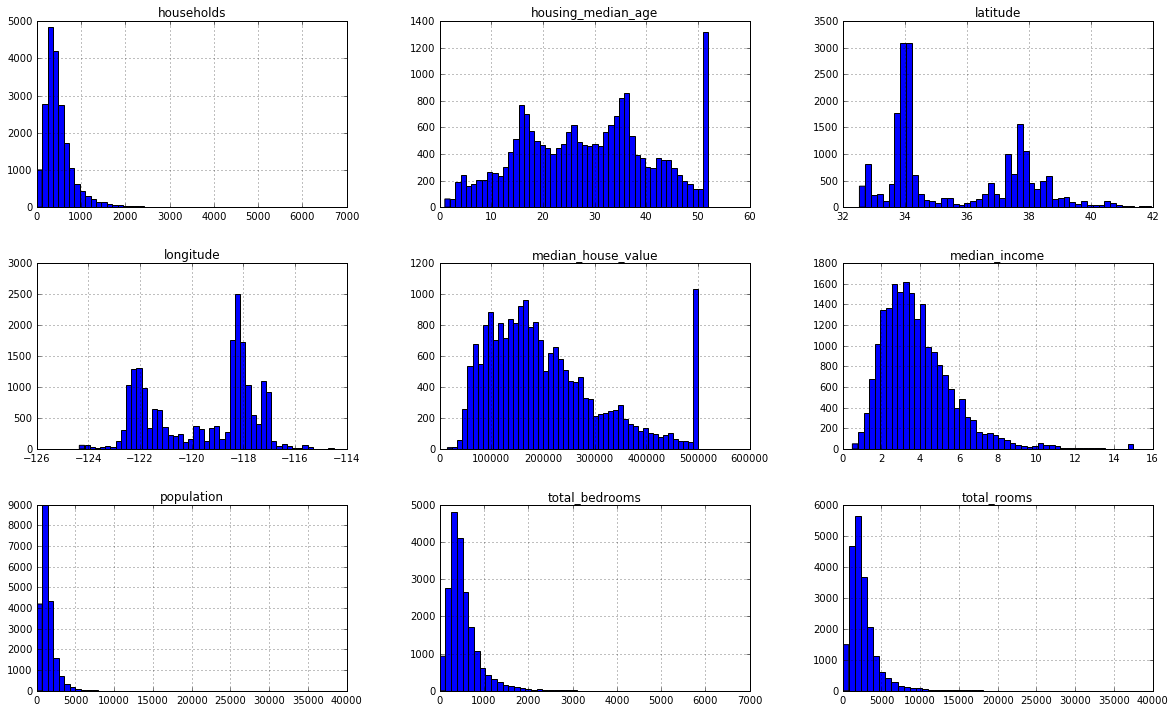

In [56]:
df.hist(bins=50, figsize=(20, 12))

In [57]:
# We can use sklearn preprocessing library for same but this is how we can write the same code in 
# python numpy

def train_test_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_indices = int(len(data)*test_ratio)
    train_data = shuffled_indices[test_indices:]
    test_data = shuffled_indices[:test_indices]
    return data.iloc[train_data], data.iloc[test_data]

In [58]:
train_set, test_set = train_test_split(df, 0.2)

In [59]:
print("train_set:"+str(len(train_set))+" test set:"+str(len(test_set)))

train_set:16512 test set:4128


But the problem with this implementation is that it will randomize and see the whole data over few run, we can fix it by initializing the random seed with some value but this will break out when there is a update in data, this will change the data in train and test both

In [60]:
# Using Scikit learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("train_set:"+str(len(train_set))+" test set:"+str(len(test_set)))

train_set:16512 test set:4128


income_cat - Creating a new column which categorize the data such a way that max median income will be 5  
our output variable y is median income

In [61]:
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]<5,5.0,inplace=True)

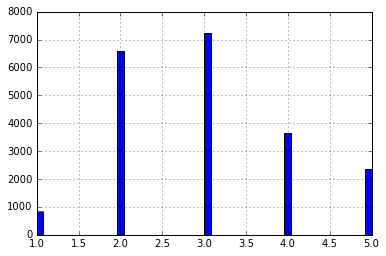

In [62]:
df["income_cat"].hist(bins=50)

As you can see, we have removed the long tail of median income and shrink the data into 1-5 range.  
Now, using sklearn Statified Split to split the data

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

In [64]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df, df["income_cat"]):    # obj.split(X, y)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [65]:
# lets check the % data distrinution in income_cat column
df["income_cat"].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [66]:
# now dropping the df["income_cat"] from the train, test data
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

In [67]:
# keeping the train data copy aside to keep it intact with our explorations steps
housing = strat_train_set.copy()

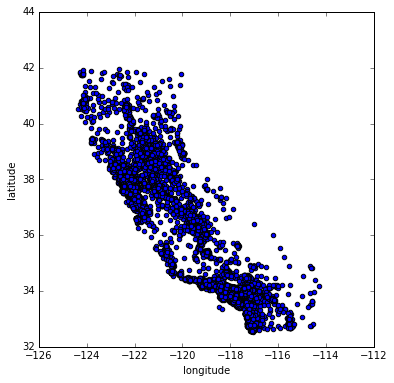

In [68]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(6, 6))

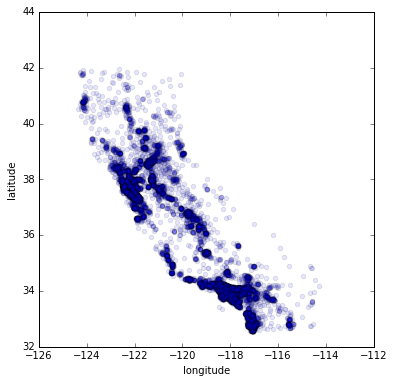

In [69]:
# for density check, add an other option alpha
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(6, 6), alpha=0.1)

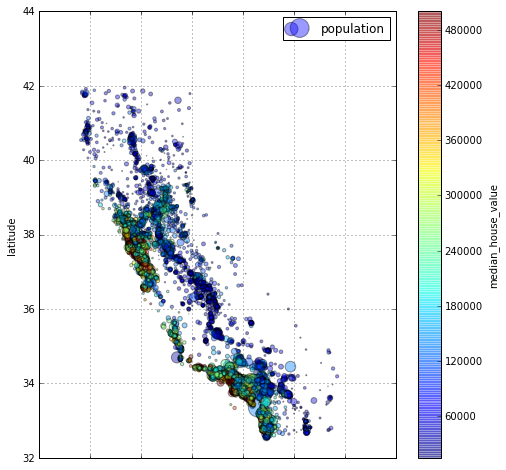

In [70]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(8, 8), alpha=0.4,
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             s=housing["population"]/100, label="population",
             grid=True,  legend=True)


### Looking for corelation if any

In [71]:
corr_matrix = housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   

                    median_house_value  
longitude                    -0.047432  
latitude                     -0.142724  
housing_median_age            0.114110  
total_rooms                   0.135097  
total_bedrooms                0.047689  
population                   -0.026920  
households                    0.064506  
median_income                 0.687160  
median_house_value            1.000000

In [72]:
# looking for relation between 
# The correlation coefficient only measures l inear correlations (“if x goes up, then y general ly goes up/down”). 
# It may completely miss out on nonl inear relationships (e.g., “if x is close to zero then y general ly goes up”)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9A70F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012C40DD8>]], dtype=object)

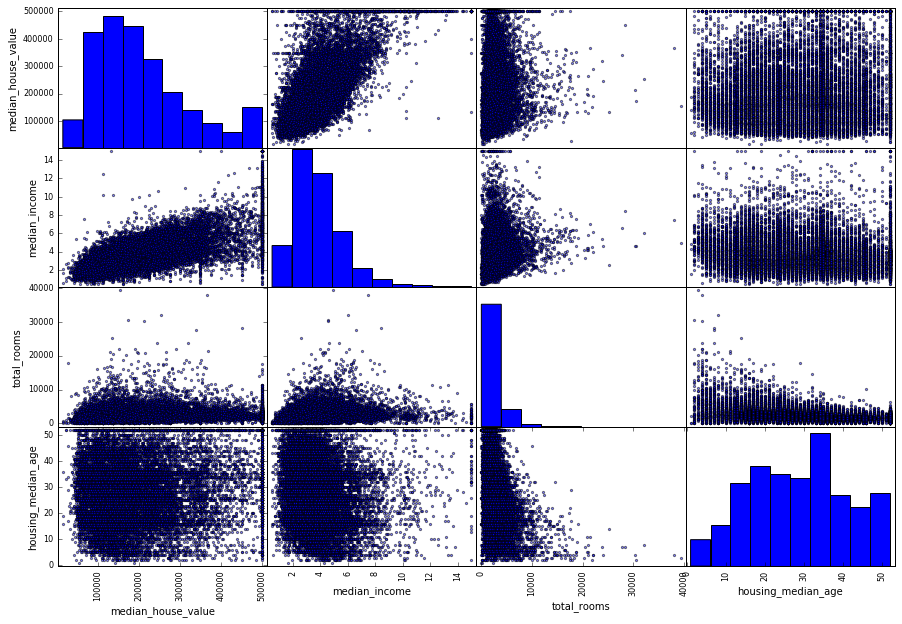

In [73]:
# Using pandas scatter matrix function
attr = ["median_house_value","median_income","total_rooms","housing_median_age"]
pd.scatter_matrix(housing[attr], figsize=(15, 10))

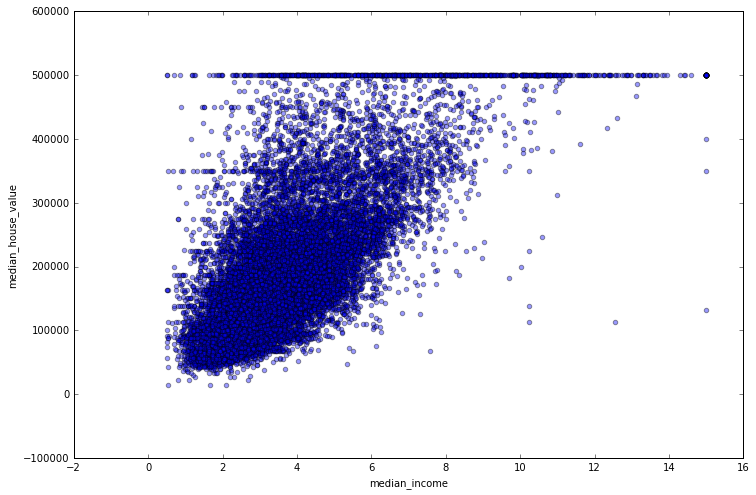

In [74]:
housing.plot(kind="scatter", y="median_house_value", x="median_income", alpha=0.4, figsize=(12,8))

### Experimenting with attribute combination

In [75]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [76]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

note	that	drop()	creates	a	copy	of	the	data	and	does	not	affect
strat_train_set

In [77]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning  
####  Handling Numerical Data  
There are 3 methods to do the data cleaning -   
a. Either Drop the particular feature (drop)  
b. Or Drop the NA values only (dropna)  
c. Or Fill NA with some value such as mean, median or other (fillna)  

```
housing.drop("total_bedrooms",	axis=1)				#	option a    
housing.dropna(subset=["total_bedrooms"])			#	option b    
median = housing["total_bedrooms"].median()    
housing["total_bedrooms"].fillna(median)			#	option c   
```

But keep one thing in mind that the fillna value is applied on test set as well.  
So you need this value to replce the na in test dataset.  
Scikit learn provides a better way to do this, Imputer  

First create a instance of Imputer method, then feed the data (numerical only) into to get the median. To use Imputer you need to remove all but numerical columns

In [78]:
housing_num = housing.drop("ocean_proximity",axis=1)  #ocean_proximity - varchar column

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

imputer.fit(housing_num)  

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [79]:
print(imputer.statistics_)
print(housing_num.median().values)

[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]
[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]


In [80]:
# convert this to pandas dataframe for better understanding
housing_median = pd.DataFrame(imputer.statistics_.reshape(1,8), columns=housing_num.columns)
housing_median

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.51     34.26                29.0       2119.5           433.0   

   population  households  median_income  
0      1164.0       408.0         3.5409

In [81]:
# we have trained the imputer on dataset, now transform our dataset
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

#### Handling Text and Categorical Data

In [82]:
# best way to convert "Text" data to some code so that we can calculate the median

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [83]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

The problem with this encoding is ML understanding of numbers, ML treat 1 and 4 to distant compare to 1 and 2.  
Which may not be the case as this is a categorical value.  To avoid this issue we go with OneHotEncoder methond, where we have single bit on and off for each category.

In [84]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
housing_cat_1hot = onehot.fit_transform(housing_cat_encoded.reshape(-1, 1))

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Above displayed array is Scipy compressed array. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array, but if you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [85]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories
to one-hot vectors) in one shot using the LabelBinarizer class:

In [86]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
housing_cat_1hot_encoded = binarizer.fit_transform(housing_cat)

housing_cat_1hot_encoded

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Transforming other features  
a. Write a Class for transforming attribute  
b. Use Pipeline, BaseEstimator OR TransformerMixin  

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [88]:
attr_adder.get_params()

{'add_bedrooms_per_room': False}

### Feature Scaling  
a. Min - Max Scaling (also called Normalization)  - Use Scikit's MinMaxScaler  
b. Standardization  - Use Scikit's StandardScaler 

Standardization is quite different: first it subtracts the mean value (so standardized values always have a
zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike
min-max scaling, standardization does not bound values to a specific range, which may be a problem for
some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income
equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–
0.15, whereas standardization would not be much affected. 

### Transformation Pipeline

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline (list)  -- list of tuples (name, transformation)
# transformation must have fit_transform() method
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),   # this is equivalent to-> imputer = Imputer(strategy="median")
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

As we have implemented Pipeline for numerical columns only, we can do the same for categorical/text columns.  
With the help of scikit learn "FeatureUnion" method, we can implement numerical as well categorical transformation in one go and combine the result of both to produce final dataset  

Each subpipeline starts with a selector transformer: it simply transforms the data by selecting the desired
attributes (numerical or categorical), dropping the rest, and converting the resulting DataFrame to a
NumPy array.

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [91]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)     # list of numerical columns
cat_attribs = ["ocean_proximity"]   # list of categorical columns

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

print(num_attribs)
print(cat_attribs)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']


In [92]:
#housing.tail(3)
housing_prepared = full_pipeline.fit_transform(housing)

### Train and Evaluate the model

In [93]:
# Linear Regression can be a base model 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
housing_predictions = lin_reg.predict(housing_prepared)

In [95]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels, housing_predictions)
line_rmse = np.sqrt(lin_mse)
line_rmse

68628.198198489219

Trying with some other model/algorithm

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [97]:
housing_predictions = tree_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
line_rmse = np.sqrt(lin_mse)
line_rmse

0.0

as we can see there is no error, which indicates that this model overfits the data, so let's check these models with Cross Validation technique

In [98]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -
scores before calculating the square root.

In [100]:
print(rmse_scores)
print(np.mean(rmse_scores))

[ 67784.52277265  68798.9718476   72039.67801005  68002.98232346
  72961.07025773  75668.03593291  69584.17937419  69960.7732639
  76281.91680959  69771.94322463]
71085.4073817


In [102]:
# better build a function

def display_error(scores):
    print("Scores:", scores)
    print("Mean:", np.mean(scores))
    print("Standard deviation:", scores.std())

In [103]:
display_error(rmse_scores)

Scores: [ 67784.52277265  68798.9718476   72039.67801005  68002.98232346
  72961.07025773  75668.03593291  69584.17937419  69960.7732639
  76281.91680959  69771.94322463]
Mean: 71085.4073817
Standard deviation: 2886.20139187


In [104]:
# let's do the same for linear regression

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_error(rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [105]:
#let's try another model

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_error(rmse_scores)

Scores: [ 52670.18001482  50348.80677872  52892.83900992  54672.42876256
  52709.57283225  54948.96736875  52121.26339085  50498.48039838
  54773.10899716  54187.20603396]
Mean: 52982.2853587
Standard deviation: 1594.01831389


In [106]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22695.712388029056

It's better to save your model, parameters, hyperparameters, cross validation score and actual prediction if possible

In [107]:
from sklearn.externals import joblib

# dumping the model
joblib.dump(forest_reg, 'forest_reg.pkl')
joblib.dump(tree_reg, 'tree_reg.pkl')

#loading the model
tree_reg_loaded = joblib.load('tree_reg.pkl')

In [109]:
tree_reg_loaded.feature_importances_

array([  6.62958649e-02,   5.61100747e-02,   4.03414845e-02,
         1.28410592e-02,   1.31259277e-02,   1.02776136e-02,
         1.12696542e-02,   4.72354615e-01,   2.79828675e-02,
         1.22657793e-01,   2.36225422e-02,   8.48678700e-04,
         1.40268030e-01,   0.00000000e+00,   4.17254879e-04,
         1.58654055e-03])

### Fine and Tune the model  

** Using Grid Search **

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [112]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [113]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [114]:
cvres = grid_search.cv_results_

for mean_scores, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_scores), params)

65404.0888668 {'n_estimators': 3, 'max_features': 2}
55613.446117 {'n_estimators': 10, 'max_features': 2}
53192.1387609 {'n_estimators': 30, 'max_features': 2}
59755.096622 {'n_estimators': 3, 'max_features': 4}
53116.0895546 {'n_estimators': 10, 'max_features': 4}
50694.1639439 {'n_estimators': 30, 'max_features': 4}
59263.1177799 {'n_estimators': 3, 'max_features': 6}
52298.8277049 {'n_estimators': 10, 'max_features': 6}
50199.3075679 {'n_estimators': 30, 'max_features': 6}
59315.502987 {'n_estimators': 3, 'max_features': 8}
51729.6741884 {'n_estimators': 10, 'max_features': 8}
49888.1835241 {'n_estimators': 30, 'max_features': 8}
61852.3749068 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
54126.063434 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
60580.4889183 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
52801.4653098 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
58821.161113 {'n_estimators': 3, 'max_features': 4, 'bootstrap': F

### Analyze the best model

In [115]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  6.52749031e-02,   6.40291613e-02,   4.39969150e-02,
         1.58179553e-02,   1.49377521e-02,   1.51419081e-02,
         1.49064223e-02,   3.83992123e-01,   5.30596760e-02,
         1.15412263e-01,   6.28743452e-02,   2.90580930e-03,
         1.42608311e-01,   1.17525167e-04,   2.22495395e-03,
         2.69997549e-03])

In [116]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.38399212319486603, 'median_income'),
 (0.1426083108433914, 'INLAND'),
 (0.11541226347731361, 'pop_per_hhold'),
 (0.065274903135532719, 'longitude'),
 (0.064029161327101694, 'latitude'),
 (0.062874345215446756, 'bedrooms_per_room'),
 (0.053059676030047707, 'rooms_per_hhold'),
 (0.043996915007104544, 'housing_median_age'),
 (0.015817955299075339, 'total_rooms'),
 (0.015141908134835678, 'population'),
 (0.014937752121754654, 'total_bedrooms'),
 (0.014906422305543099, 'households'),
 (0.00290580929823078, '<1H OCEAN'),
 (0.0026999754883498483, 'NEAR OCEAN'),
 (0.0022249539544208223, 'NEAR BAY'),
 (0.00011752516698529767, 'ISLAND')]

### Evaluate the model on TEST Set

In [117]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [119]:
final_rmse

48203.962654764393